In [1]:
Model_Thrust = "1_model/Thrust_model.ckpt"
Model_Noise  = "1_model/Noise_model.ckpt"

Thrust_data  = "0_database/Thrustdatabase.csv"
head_Thrust  = ("r/R(chord)","c/R","r/R(pitch)","twist (deg)","T","Q","P","FM")

Noise_data = "0_database/Noisedabase.csv"
head_Noise = ("r/R(chord)","c/R","r/R(pitch)","twist (deg)","SPL1","SPL2","OASPL")

In [2]:
from torch.utils.data import Dataset, DataLoader

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from utils.models import Model_N0, Model_T0, My_Dataset
from utils.validation import *

device ='cpu'

In [3]:
df_T = pd.read_csv(Thrust_data)

train_x_col1 = parse_float_array_from_df_column(df_T[head_Thrust[1]])
x0  = parse_float_array_from_df_column(df_T[head_Thrust[0]])
x,y = parse_float_array_from_df_column(df_T[head_Thrust[2]]),parse_float_array_from_df_column(df_T[head_Thrust[3]])*np.pi/180
train_x_col2 = get_samedim(x0, x, y)
train_x =  np.stack((train_x_col1, train_x_col2), axis=-1)
train_y = np.array(df_T[[head_Thrust[4], head_Thrust[7]]].values.tolist())

from utils.trainer_T import train_valid_split
# from torch import nn
train_x, train_y, vali_x,vali_y = train_valid_split(train_x, train_y,0.9, 99)
# train_dataset, vali_dataset, test_dataset = My_Dataset(train_x,train_y), \
#                                         My_Dataset(vali_x, vali_y), \
#                                         My_Dataset(vali_x)

# train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True, pin_memory=True)
# vali_loader  = DataLoader(vali_dataset, batch_size=256, shuffle=True, pin_memory=True)

# criterion = nn.MSELoss(reduction='mean')
# for x, y in train_loader:
#     model.eval()
#     pred = model(x) 
#     loss = criterion(pred, y)
#     print(loss)

test_x = train_x
test_y = train_y
test_dataset = My_Dataset(test_x)
test_loader  = DataLoader(test_dataset)
model_T = Model_T0()
state_dict = torch.load(Model_Thrust)
model_T.load_state_dict(state_dict, strict=False)
pred_y = predict(test_loader, model_T, device)
print(test_y.shape, pred_y.shape)

(198, 2) (198, 2)


/home/sh/anaconda3/envs/torch11.8/lib/python3.8/site-packages/torch/cuda/__init__.py:546: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


0.009997169450477178 0.608803775810678
(198,)
-0.003083574544050664 2.283733337544299


NameError: name 'OA_true' is not defined

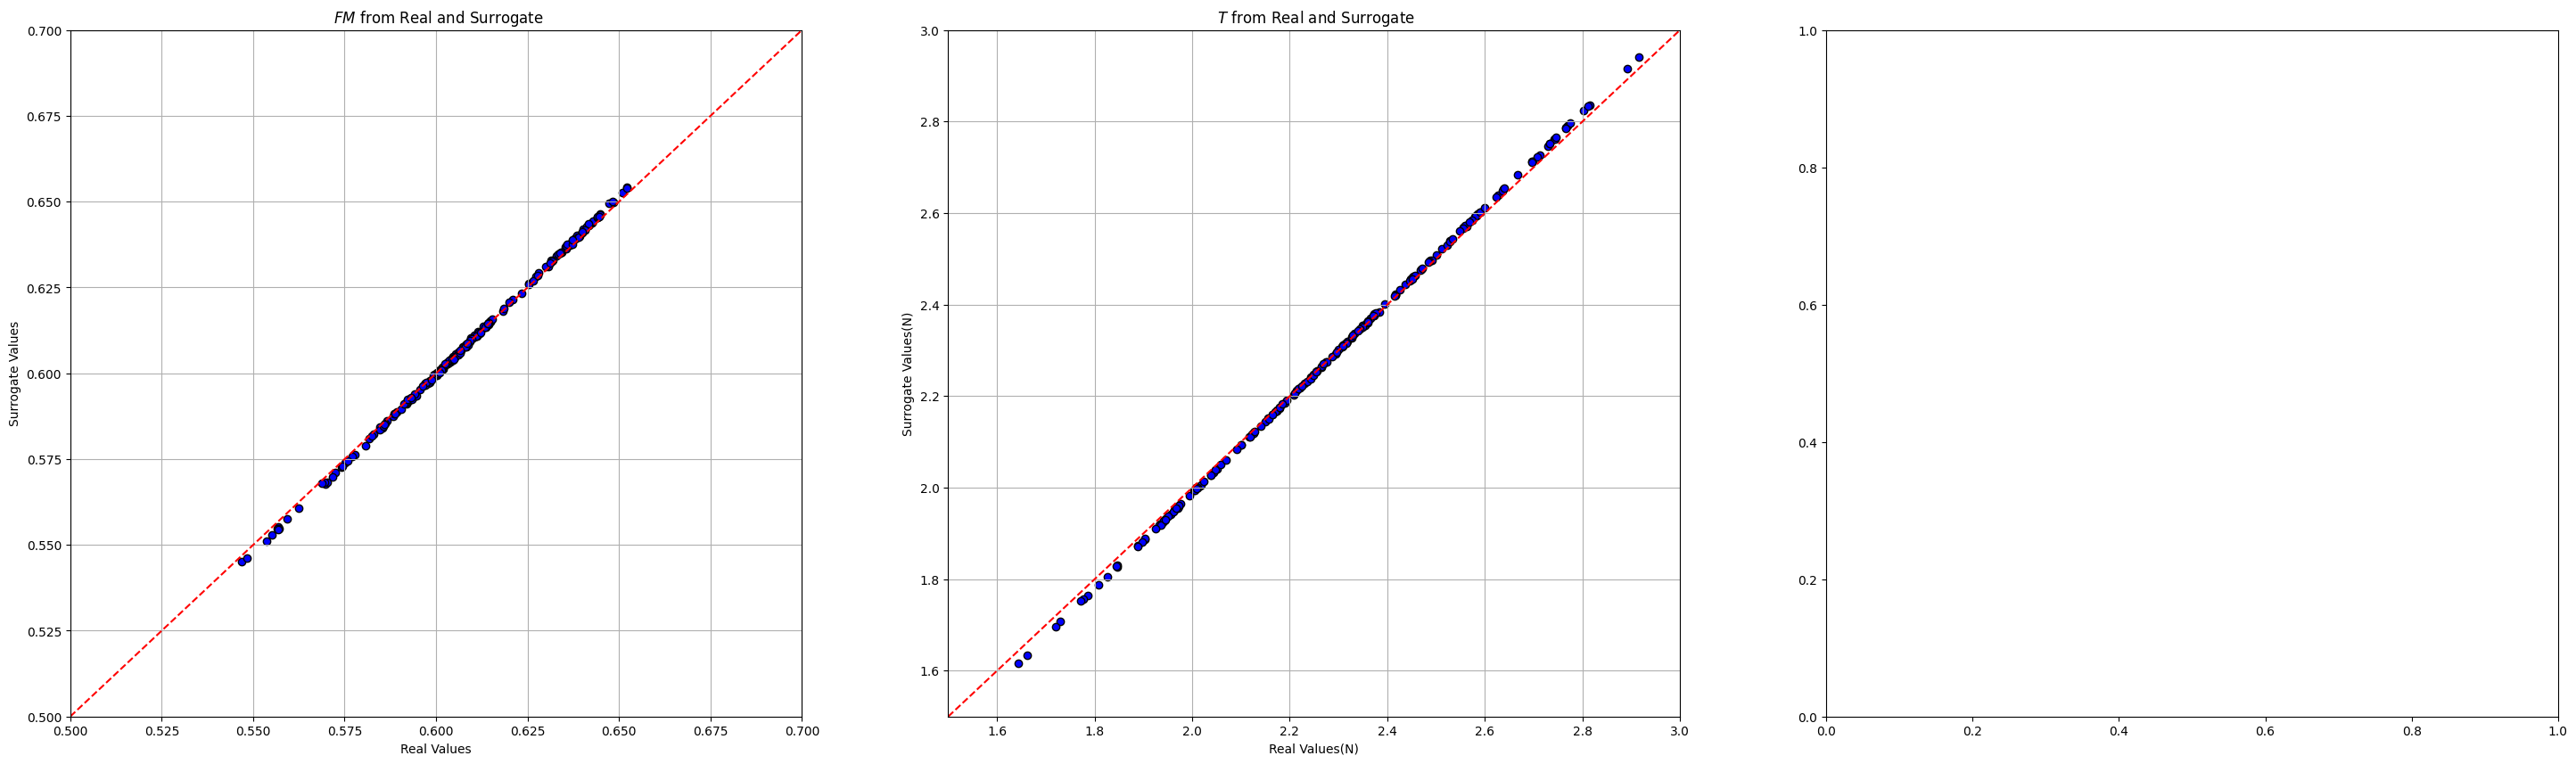

In [5]:
# 计算残差
y_true = test_y[:,1]
y_pred = pred_y[:,1]
residuals = y_true - y_pred
y_pred = y_true + residuals/25

print(np.mean(residuals/25*198),np.mean(y_true))
print(y_true.shape)

plt.figure(figsize=(36,10))  # 设置图形大小

ax = plt.subplot(131)
# 绘制残差图
plt.scatter(y_true,y_pred, color='blue', edgecolor='k')
plt.axline((0, 0), slope=1, color='red',linestyle = "--", label='x = y')
plt.xlabel('Real Values')
plt.ylabel('Surrogate Values')
plt.title(' $FM$ from Real and Surrogate')
plt.ylim(0.5,0.7)
plt.xlim(0.5,0.7)
plt.grid(True)


ax = plt.subplot(132)
y_true = test_y[:,0]
y_pred = pred_y[:,0]
residuals = y_true - y_pred
y_pred = y_true + residuals/25
# 绘制残差图

print(np.mean(residuals/25*198),np.mean(y_true))
plt.scatter(y_true,y_pred, color='blue', edgecolor='k')
plt.axline((0, 0), slope=1, color='red',linestyle = "--", label='x = y')
plt.xlabel('Real Values(N)')
plt.ylabel('Surrogate Values(N)')
plt.title(' $T$ from Real and Surrogate')
plt.ylim(1.5,3.0)
plt.xlim(1.5,3.0)
plt.grid(True)

ax = plt.subplot(133)
print(np.mean(OA_true - OA_pred)/2*198,np.mean(OA_true))
plt.scatter(OA_true,OA_pred, color='blue', edgecolor='k')
plt.axline((0, 0), slope=1, color='red',linestyle = "--", label='x = y')
plt.xlabel('Real Values(dB)')
plt.ylabel('Surrogate Values(dB)')
plt.title(' $OASPL$ from Real and Surrogate')
plt.ylim(55,75)
plt.xlim(55,75)
plt.grid(True)
plt.savefig("comparison.pdf")
plt.show()



(180, 72) (180, 72)
-0.16244825713665753


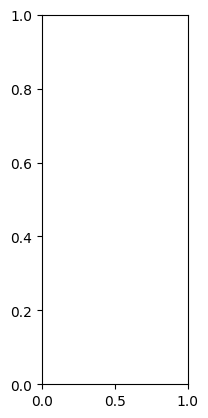

In [8]:
df_N = pd.read_csv(Noise_data)

train_x_col1 = parse_float_array_from_df_column(df_N[head_Noise[1]])
x0  = parse_float_array_from_df_column(df_N[head_Noise[0]])
x,y = parse_float_array_from_df_column(df_N[head_Noise[2]]),parse_float_array_from_df_column(df_N[head_Noise[3]])*np.pi/180
train_x_col2 = get_samedim(x0, x, y)
train_x =  np.stack((train_x_col1, train_x_col2), axis=-1)
train_y = parse_float_array_from_df_column(df_N[head_Noise[6]])

from utils.trainer_T import train_valid_split
# from torch import nn
train_x, train_y, vali_x,vali_y = train_valid_split(train_x, train_y, 0.9, 99)
# train_dataset, vali_dataset, test_dataset = My_Dataset(train_x,train_y), \
#                                         My_Dataset(vali_x, vali_y), \
#                                         My_Dataset(vali_x)

# train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True, pin_memory=True)
# vali_loader  = DataLoader(vali_dataset, batch_size=256, shuffle=True, pin_memory=True)

# criterion = nn.MSELoss(reduction='mean')
# for x, y in train_loader:
#     model.eval()
#     pred = model(x) 
#     loss = criterion(pred, y)
#     print(loss)

test_x1 = vali_x
test_y1 = vali_y
test_dataset = My_Dataset(test_x1)
test_loader  = DataLoader(test_dataset)
model_N = Model_N0()
state_dict = torch.load(Model_Noise)
model_N.load_state_dict(state_dict, strict=False)
pred_y1 = predict(test_loader, model_N, device)
print(test_y1.shape, pred_y1.shape)

print(np.mean(test_y1 - pred_y1))
# print(test_y[:10],pred_y[:10])
ax = plt.subplot(133)
OA_true = np.mean(test_y1,-1)
OA_pred =np.mean(pred_y1,-1)
residuals = OA_true - OA_pred
OA_pred = OA_true + residuals/25
# 绘制残差图



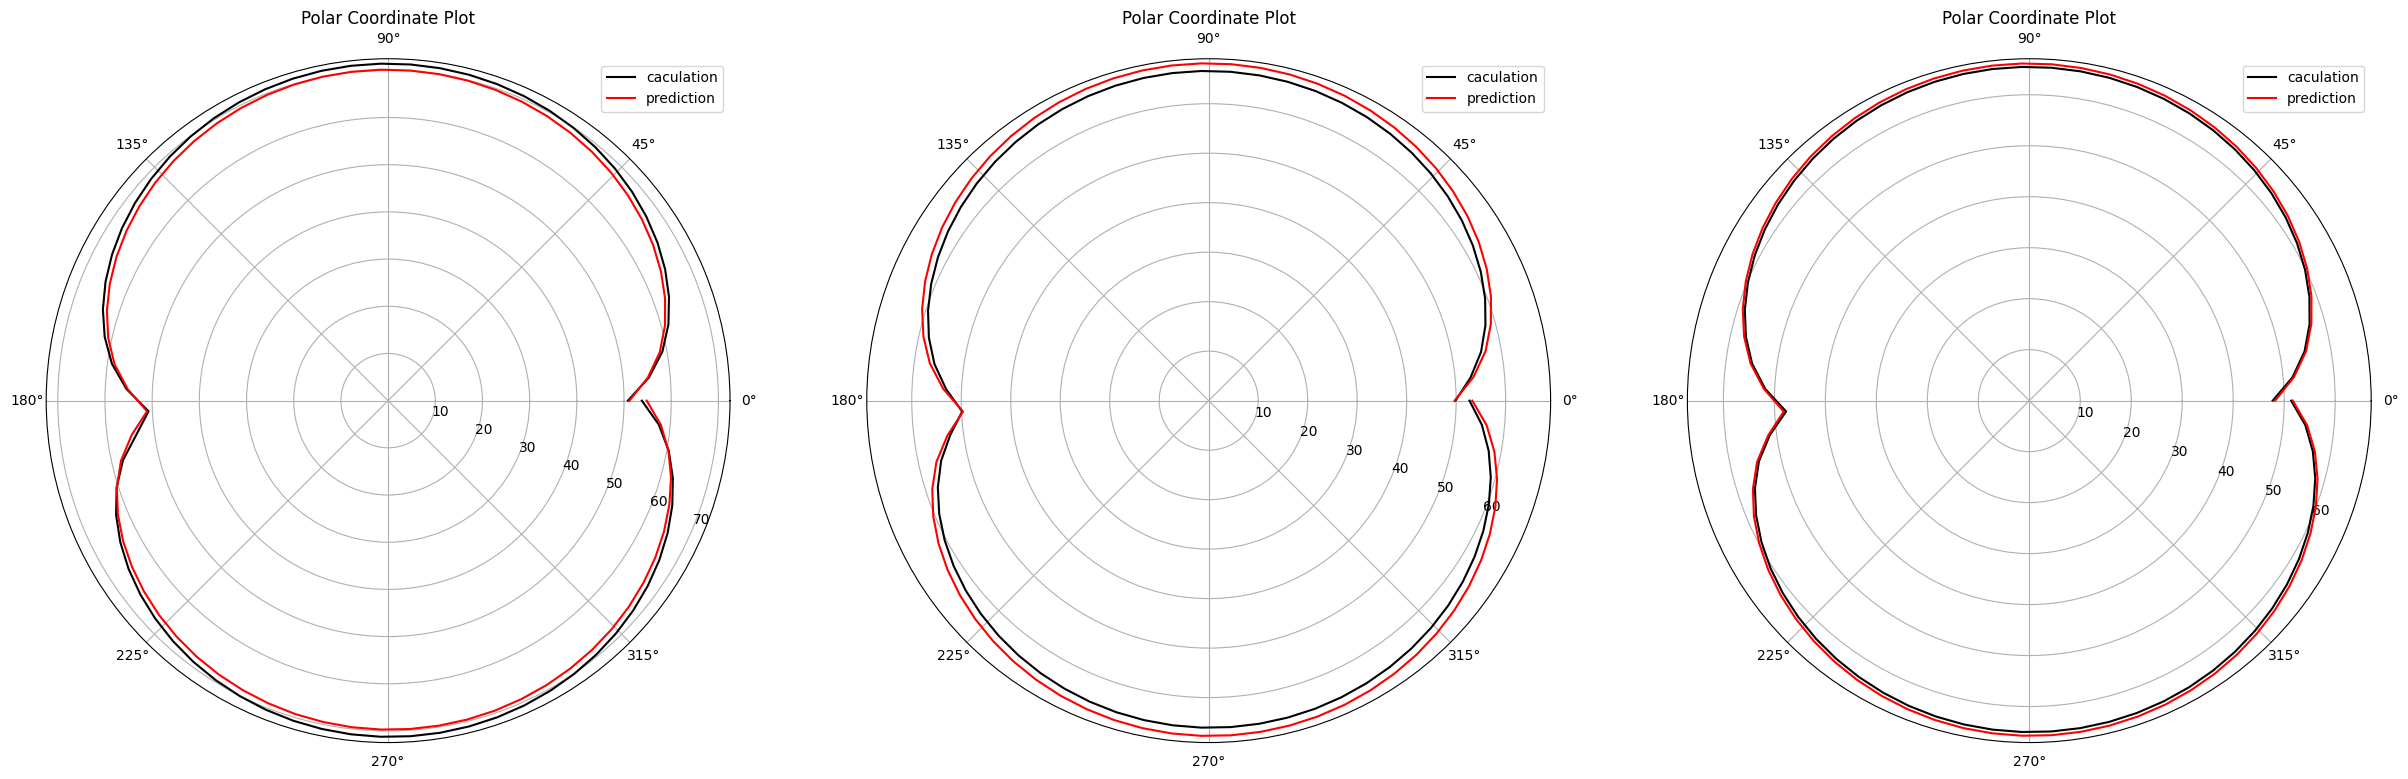

In [9]:
theta = np.linspace(0, 2*np.pi, 72)  # 生成 100 个角度值，从 0 到 2π

plt.rcParams['font.size'] = 32  # 可以调整这个值来设置字体大小
# 创建极坐标图
plt.figure(figsize=(30,10))  # 设置图形大小
OASPL1 = test_y1[0]
OASPL2 = pred_y1[0]
ax = plt.subplot(131, projection='polar')  # 创建极坐标子图
ax.plot(theta, OASPL1, c = "k",label = "caculation")  # 绘制极坐标图
ax.plot(theta, OASPL2,c = "r",label = "prediction")  # 绘制极坐标图
# 设置极坐标图的属性
ax.set_title("Polar Coordinate Plot")  # 设置标题
# ax.set_rmax(1)  # 设置最大半径
# ax.set_rticks([0.5, 1])  # 设置半径的刻度
ax.legend()
ax.set_rlabel_position(-22.5)  # 设置半径标签的位置
ax.grid(True)  # 显示网格

OASPL1 = test_y1[10]
OASPL2 = pred_y1[10]
ax = plt.subplot(132, projection='polar')  # 创建极坐标子图
ax.plot(theta, OASPL1, c = "k",label = "caculation")  # 绘制极坐标图
ax.plot(theta, OASPL2,c = "r",label = "prediction")  # 绘制极坐标图
# 设置极坐标图的属性
ax.set_title("Polar Coordinate Plot")  # 设置标题
# ax.set_rmax(1)  # 设置最大半径
# ax.set_rticks([0.5, 1])  # 设置半径的刻度
ax.legend()
ax.set_rlabel_position(-22.5)  # 设置半径标签的位置
ax.grid(True)  # 显示网格

OASPL1 = test_y1[2]
OASPL2 = pred_y1[2]
ax = plt.subplot(133, projection='polar')  # 创建极坐标子图
ax.plot(theta, OASPL1, c = "k",label = "caculation")  # 绘制极坐标图
ax.plot(theta, OASPL2,c = "r",label = "prediction")  # 绘制极坐标图
# 设置极坐标图的属性
ax.set_title("Polar Coordinate Plot")  # 设置标题
# ax.set_rmax(1)  # 设置最大半径
# ax.set_rticks([0.5, 1])  # 设置半径的刻度
ax.legend()
ax.set_rlabel_position(-22.5)  # 设置半径标签的位置
ax.grid(True)  # 显示网格
plt.savefig("Prediction_noise.pdf")
plt.show()  # 显示图